In [1]:
import util
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import time
import cycler

font = {
    'family':'serif', 
    'weight':'normal', 
    'size':12
}
matplotlib.rc('font', **font)

axes_prop_cycle = {
    'markersize':[8]*20,
    'linewidth':[1]*20,
    'markevery': [8]*20,
    'marker':['o', 'X', 's', 'P', 'D']*4,
    'color':sns.color_palette("Set1", 20)
}
matplotlib.rc('axes', prop_cycle=cycler.cycler(**axes_prop_cycle))

matplotlib.rc('mathtext', fontset='cm')

pd.options.display.float_format = '{:,.4f}'.format

In [2]:
def show_results(results, axs, num_bins_exp, legend=False):
    bps = axs[0].boxplot(results, vert=False, labels=results.columns, patch_artist=True)
    axs[0].set_xscale('log')
    axs[0].grid(axis='x')
    axs[0].set_title(r'Memory units: $10^{' + num_bins_exp + '}$')
    axs[0].set_yticklabels([])
    
    for i, j, k, l in zip(bps['boxes'], bps['medians'], axes_prop_cycle['marker'][3::-1], axes_prop_cycle['color']):
        i.set_facecolor(l)
        j.set_color('black')
        j.set_marker(k)
        j.set_markevery(1)
        j.set_markerfacecolor(l)
    
    sns.ecdfplot(results, log_scale=True, ax=axs[1], legend=legend, alpha=0.8)
    axs[1].grid()
    axs[1].set_ylim([-0.05, 1.05])
    
    return bps

In [3]:
ts_all = util.load_call_center_data()

In [4]:
results = {}

samples = [i[1] for i in ts_all.groupby([ts_all.dt.isocalendar().week])]

for num_bins in (10 ** np.arange(1.5,3,0.5)).astype(int):
    print(num_bins)
    results[num_bins] = util.get_results_call_center(num_bins, samples, 10)

31


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 53/53 [03:36<00:00,  4.09s/it]

100



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 53/53 [07:18<00:00,  8.27s/it]

316



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 53/53 [12:05<00:00, 13.69s/it]


In [5]:
filename = f'./data_pdf_files/call_center_{int(time.time())}.pkl'
pd.to_pickle(results, filename)
print(filename)  # ./data_pdf_files/call_center_1654216224.pkl

./data_pdf_files/call_center_1654216224.pkl


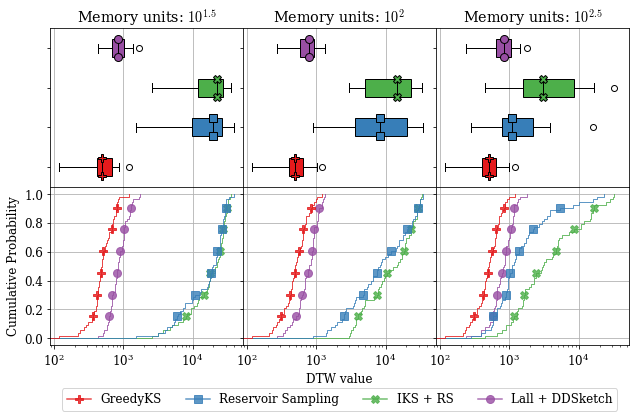

In [6]:
fig, axs = plt.subplots(2,3, sharex=True, figsize=(9,6), gridspec_kw={'hspace':0.0, 'wspace':0.0})

for e, (i,j,k) in enumerate(zip(results, axs.T, ['1.5', '2', '2.5'])):
    zz = show_results(results[i], j, k, e == 1)
    j[0].set_yticklabels([])
    
    if e:
        j[1].set_yticklabels([])
        j[1].set_ylabel('')
    

axs[1,0].set_ylabel('Cumulative Probability')
axs[1,1].set_xlabel('DTW value')
sns.move_legend(axs[1,1], loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.45))

for i, j in zip(axs[1,1].legend_.legendHandles, axes_prop_cycle['marker'][3::-1]): 
    i.set_marker(j)
    i.set_markersize(8)


fig.tight_layout()

fig.savefig('./data_pdf_files/call_center.pdf')

In [7]:
for i in results:
    print('Memory units:', i)
    display(results[i].describe())
    display(pd.DataFrame({j: st.wilcoxon(results[i][j], results[i]['GreedyKS'])._asdict() for j in results[i] if j != 'GreedyKS'}))

Memory units: 31


,GreedyKS,Reservoir Sampling,IKS + RS,Lall + DDSketch
count,53.0000,53.0000,53.0000,53.0000
mean,530.3212,"18,747.2827","20,081.5475",897.8462
std,197.0045,"9,698.5330","9,473.1382",282.2418
min,117.0982,"1,501.2078","2,555.7114",430.1802
25%,413.3098,"9,855.4326","11,876.5952",685.5020
50%,488.7863,"19,793.4777","22,576.7737",837.1631
75%,678.2640,"26,862.1617","27,915.7247","1,026.7351"
max,"1,196.6186","40,159.2829","35,889.0454","1,762.4148"


,Reservoir Sampling,IKS + RS,Lall + DDSketch
statistic,0.0000,0.0000,71.0000
pvalue,0.0000,0.0000,0.0000


Memory units: 100


,GreedyKS,Reservoir Sampling,IKS + RS,Lall + DDSketch
count,53.0000,53.0000,53.0000,53.0000
mean,537.5678,"12,575.9912","15,137.9262",785.9953
std,221.9466,"10,515.0477","9,856.1993",258.5317
min,117.1324,894.7670,"2,931.7933",268.2201
25%,403.3510,"3,597.7378","5,075.8732",580.2982
50%,497.7027,"8,417.4203","14,770.1352",787.9670
75%,647.9213,"20,320.9067","23,294.7166",915.9405
max,"1,193.8928","35,036.9072","33,674.0966","1,346.1508"


,Reservoir Sampling,IKS + RS,Lall + DDSketch
statistic,0.0000,0.0000,171.0000
pvalue,0.0000,0.0000,0.0000


Memory units: 316


,GreedyKS,Reservoir Sampling,IKS + RS,Lall + DDSketch
count,53.0000,53.0000,53.0000,53.0000
mean,533.0919,"2,727.1368","6,707.1841",846.5791
std,214.6822,"4,524.4870","8,088.9767",293.0571
min,117.1324,277.7409,449.8244,231.6614
25%,403.3646,792.4203,"1,586.3887",647.3577
50%,499.7469,"1,097.6416","3,083.4510",840.5867
75%,648.4458,"2,216.4817","8,573.2007","1,038.5105"
max,"1,193.8928","23,418.2686","32,165.6639","1,804.2846"


,Reservoir Sampling,IKS + RS,Lall + DDSketch
statistic,24.0000,2.0000,134.0000
pvalue,0.0000,0.0000,0.0000
